In [1]:
# Import all the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.style.use('fivethirtyeight')

# Feature Engineering 
from sklearn.preprocessing import LabelEncoder


# Model Selection
from sklearn.model_selection import train_test_split

# handle Imbalanced Data
from imblearn.over_sampling import RandomOverSampler

#Models
from sklearn.tree import DecisionTreeClassifier



# Model Evaluation
from sklearn.metrics import accuracy_score

# Hyper-Tuning 
from sklearn.model_selection import  GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [19]:
df= pd.read_csv(r'C:\Users\rachi nikose\Downloads\income_evaluation.csv')

In [20]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Understanding data

In [21]:
print('Data Size:',df.shape)

Data Size: (32561, 15)


In [22]:
#Checking Null values if any
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [24]:
#to remove space in columns
df.columns= df.columns.str.strip()

In [25]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [26]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [27]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [28]:
df['income']=df['income'].map({' <=50K':0, ' >50K':1})

In [29]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [30]:
df.rename(columns ={'fnlwgt':'final_wt'},inplace=True)

In [31]:
#to check duplicate value
df.duplicated().sum()

24

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.head()

,age,workclass,final_wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [34]:
df['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [35]:
df['native-country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [37]:
df['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

# Checking Imbalanced Data 

<AxesSubplot:>

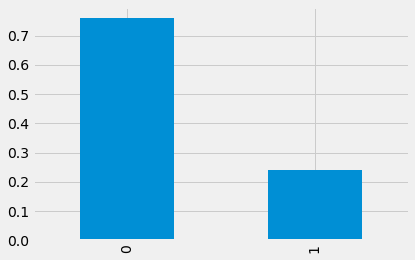

In [38]:
df['income'].value_counts(normalize=True).plot(kind='bar')

we can see above data is imbalanced, more class belongs to less than or equal to 50k

# Data Visualisation 

# EDA

In [47]:
df.sample(7)

,age,workclass,final_wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
15624,29,Private,24562,Bachelors,13,Divorced,Other-service,Unmarried,Other,Female,0,0,40,United-States,0
21600,33,Private,204494,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,56,United-States,1
19027,41,Federal-gov,19914,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,1
21112,32,Private,199529,Some-college,10,Separated,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,0,1980,40,United-States,0
31261,24,Private,222853,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,0,50,United-States,0
23647,42,Federal-gov,70240,Some-college,10,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,United-States,0
4574,36,Self-emp-inc,37019,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,United-States,0


In [41]:
#statistical analysis
df.describe()

,age,final_wt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [42]:
#separating numerical and cat fuctions 
num_fea=[fea for fea in df.columns if df[fea].dtype !='O']

In [43]:
cat_fea=[fea for fea in df.columns if df[fea].dtype =='O']

In [44]:
num_fea

['age',
 'final_wt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

In [45]:
cat_fea

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

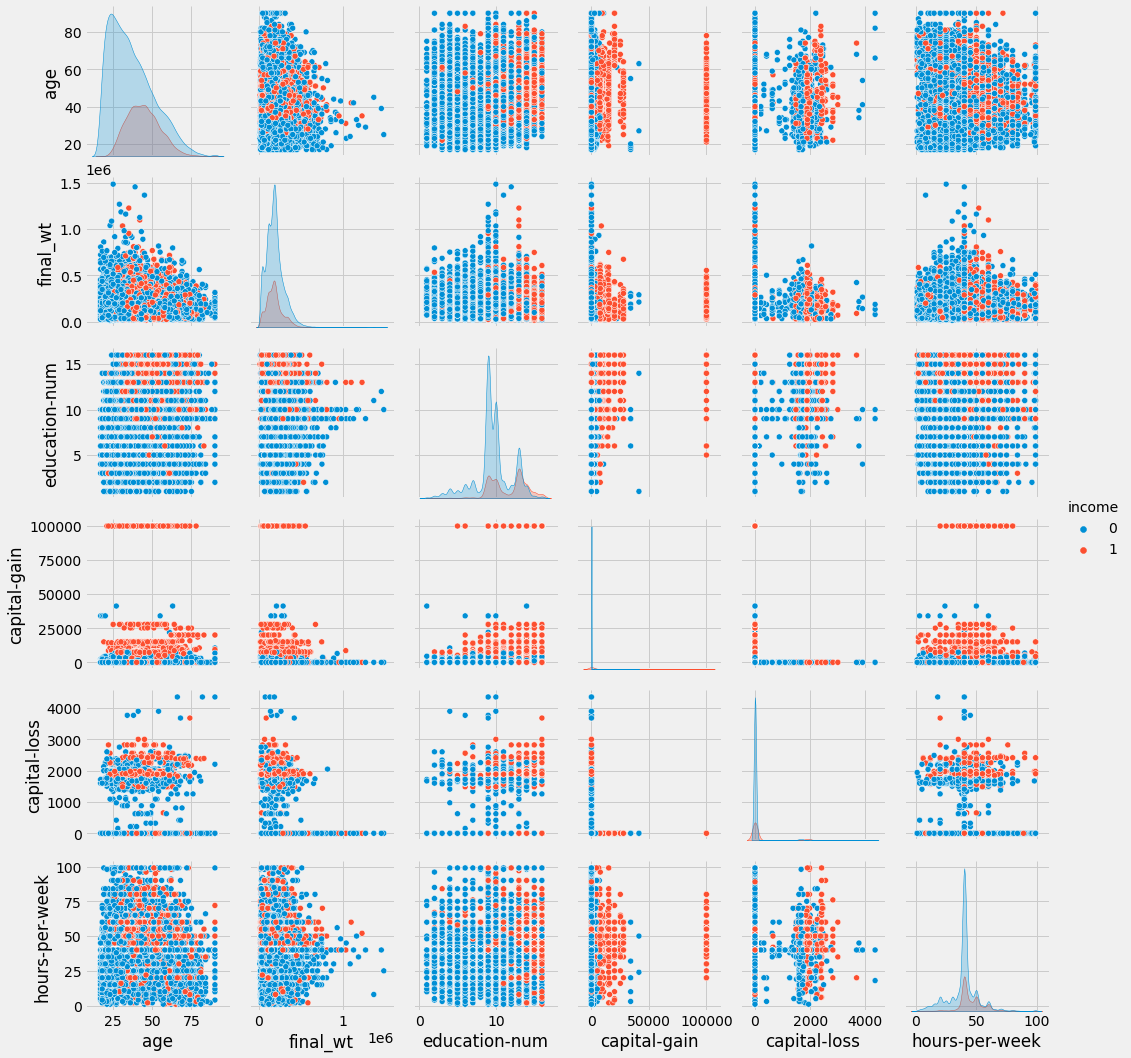

In [46]:
sn.pairplot(df,hue='income')

<AxesSubplot:xlabel='sex', ylabel='count'>

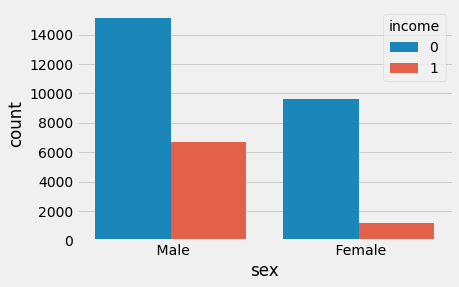

In [48]:
sn.countplot(df['sex'],hue=df['income'])

from above plot, we can say that male  are earning more than female

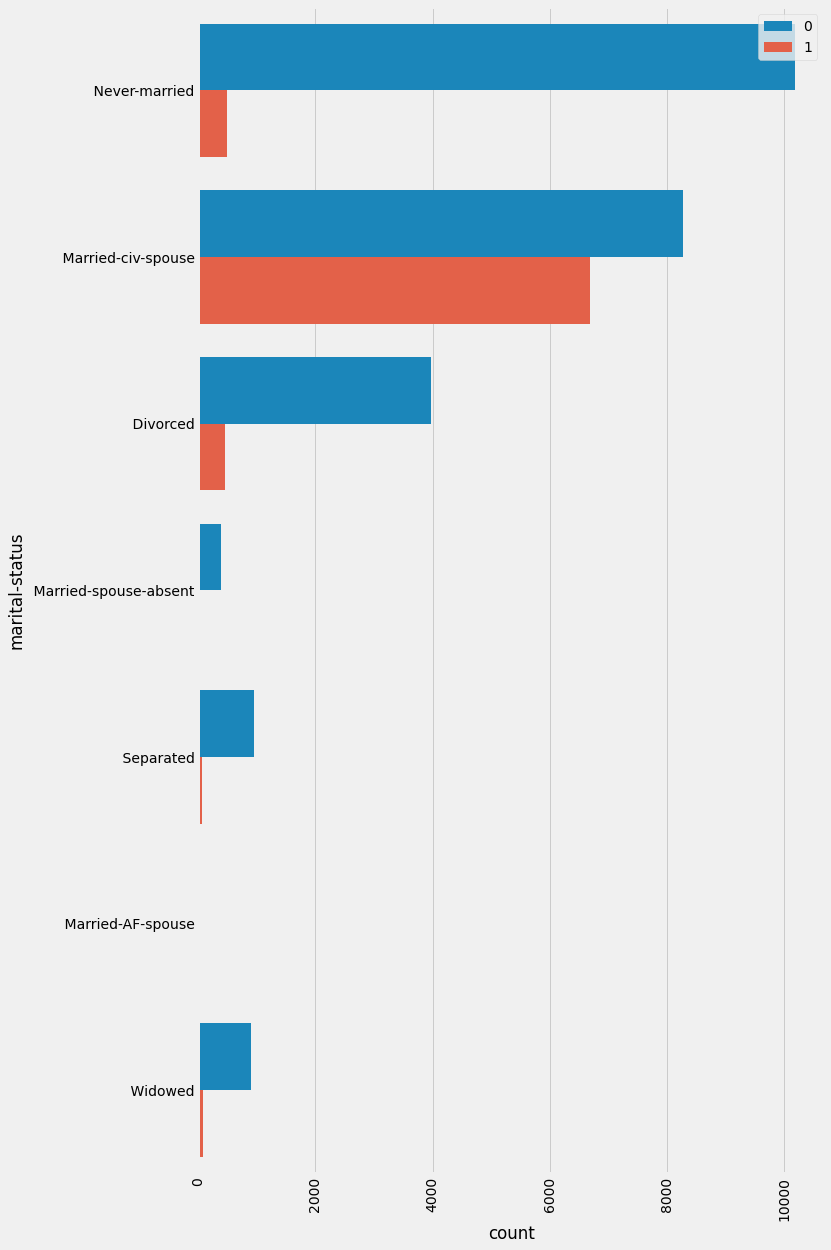

In [49]:
plt.figure(figsize=(10,20))
sn.countplot(y=df['marital-status'],hue=df['income'])
plt.xticks(rotation=90)
plt.legend(loc='upper right')

people belonging to 'never married' status, are earning more than that of people belonging to other relationship status. 

<AxesSubplot:xlabel='count', ylabel='relationship'>

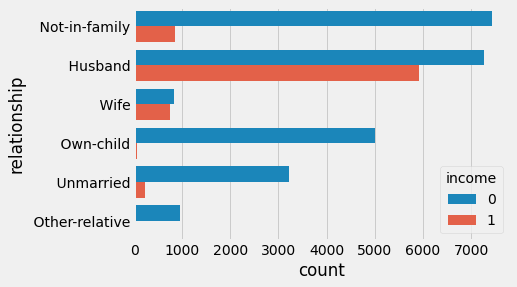

In [50]:
sn.countplot(y=df['relationship'], hue=df['income'])

In [51]:
df.columns

Index(['age', 'workclass', 'final_wt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='occupation'>

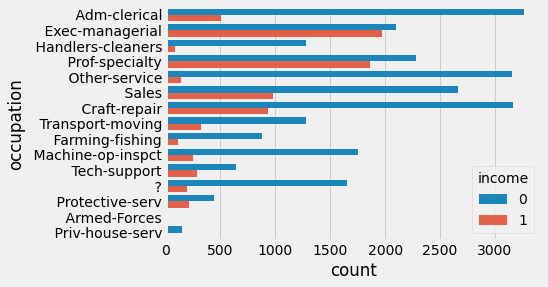

In [52]:

sn.countplot(y='occupation', hue= 'income', data=df)

1) people belonging to exec-managerical occupation, have high income.
2) people earning less than 50k comes under Adm-clerical occupation

<AxesSubplot:xlabel='count', ylabel='education'>

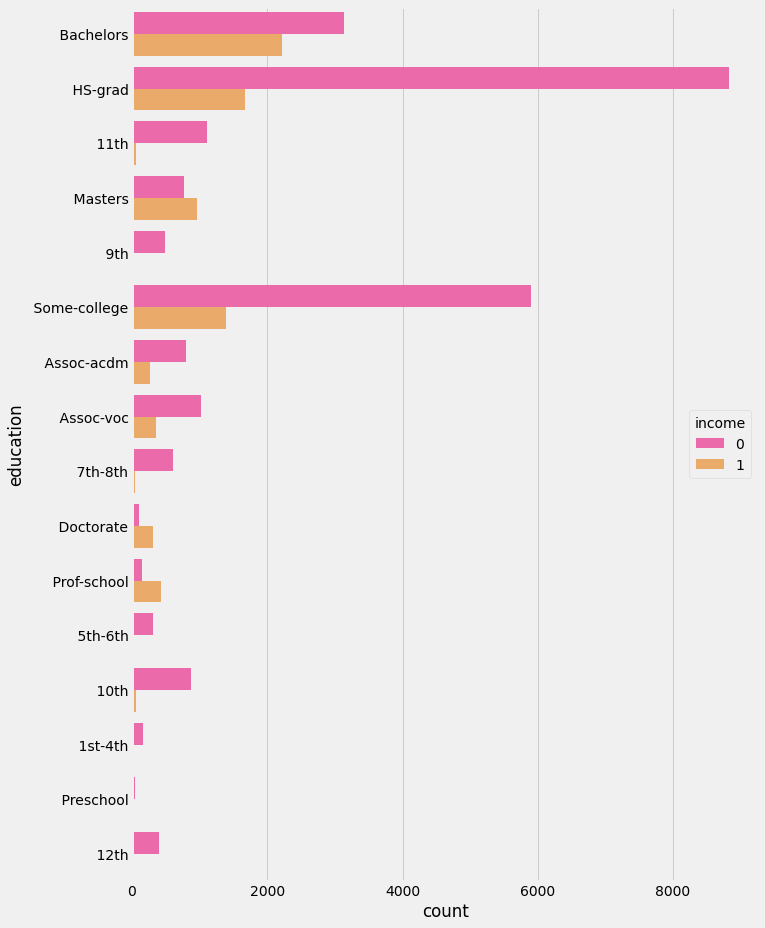

In [53]:
plt.figure(figsize=(10,15))
sn.countplot(y='education', hue= 'income', data=df, palette= 'spring')

among all,  mostly hs and graduate are involved in earning 

<AxesSubplot:xlabel='count', ylabel='race'>

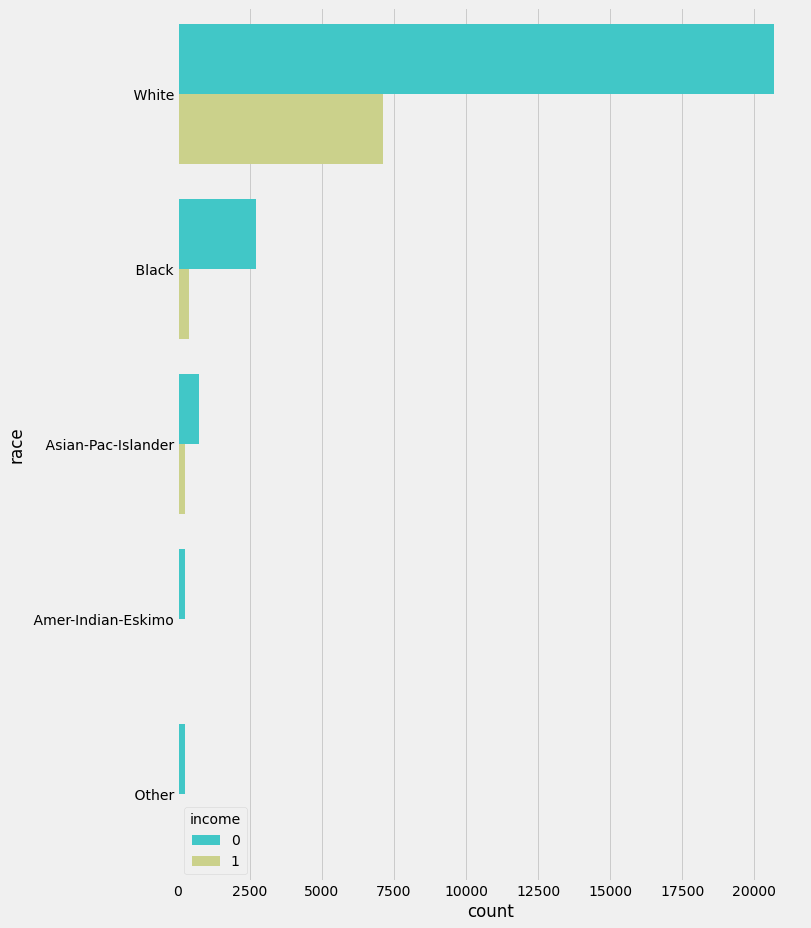

In [54]:
plt.figure(figsize=(10,15))
sn.countplot(y='race', hue= 'income', data=df, palette= 'rainbow')

white-people community are earning more than any other community

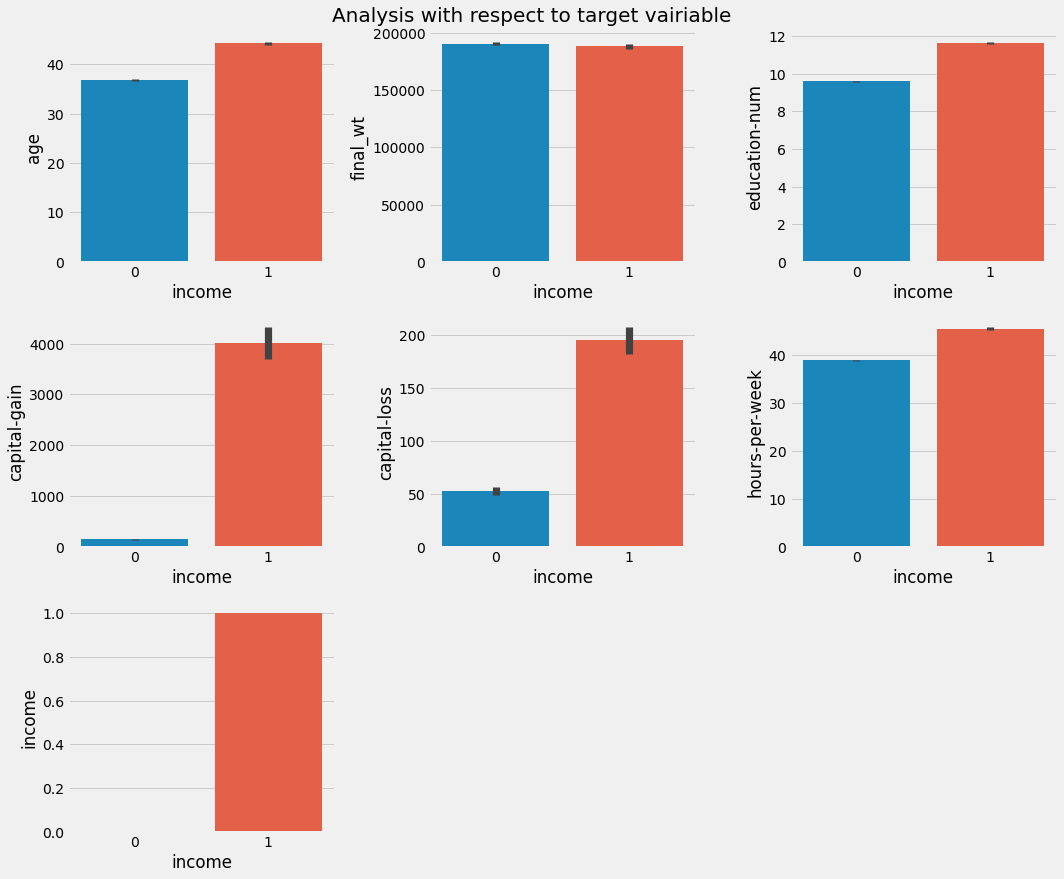

In [55]:
#bivariate analysis with respect to targert variable
plt.figure(figsize=(15,20))
plt.suptitle('Analysis with respect to target vairiable', fontsize= 20)
for i in range(0, len(num_fea)):
    plt.subplot(5, 3, i+1)
    sn.barplot(y= num_fea[i], x= 'income', data=df)
    plt.tight_layout()


# Observations

1. The bar plot above are bivariate plots.
2. In terms of Age, older the person, more is the probability of income getting higher.
3. Capital gain, and capital loss are more experienced by people having higher income
4. People having higher income are working more hours per week compare to people with lower income

# is there any realtion between sex and and hours per week?

<AxesSubplot:xlabel='sex', ylabel='hours-per-week'>

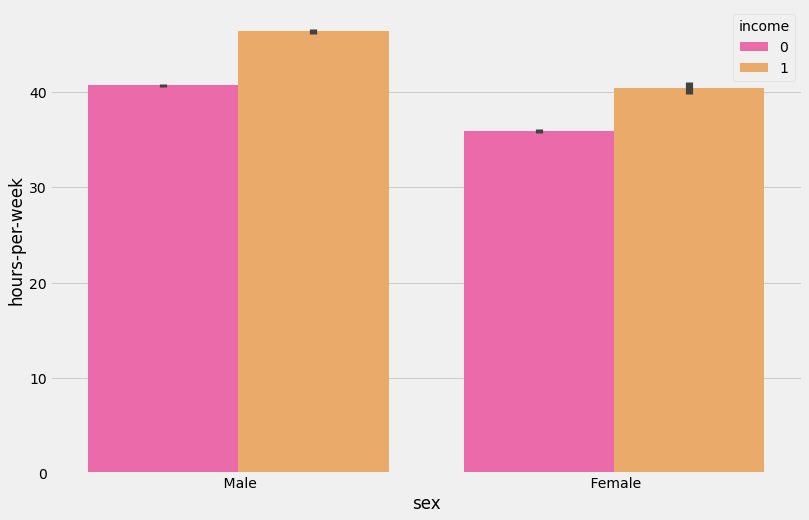

In [56]:
plt.figure(figsize=(12,8))
sn.barplot(x='sex', y='hours-per-week', data=df,hue= 'income', palette= 'spring')

males work for more hours than females

<AxesSubplot:>

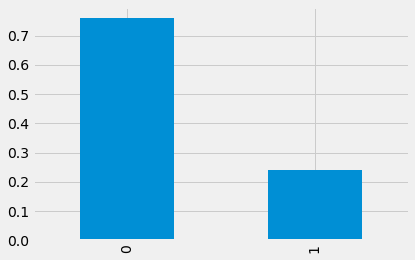

In [57]:
df['income'].value_counts(normalize=True).plot(kind='bar')

more people are earning less than or equal to 50k

# Check the Special Symbol 

<AxesSubplot:>

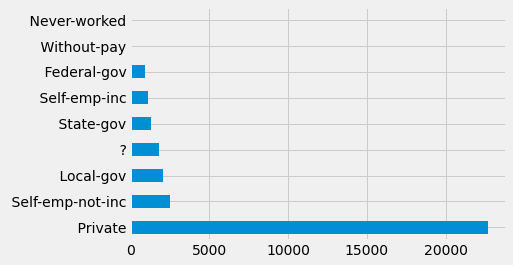

In [58]:
df['workclass'].value_counts().plot(kind='barh')

# Check the Special Symbol

<AxesSubplot:>

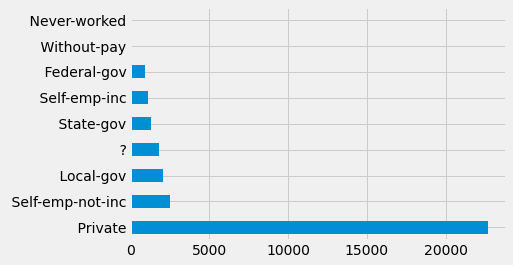

In [59]:
df['workclass'].value_counts().plot(kind='barh')

In [60]:
df.columns

Index(['age', 'workclass', 'final_wt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<AxesSubplot:>

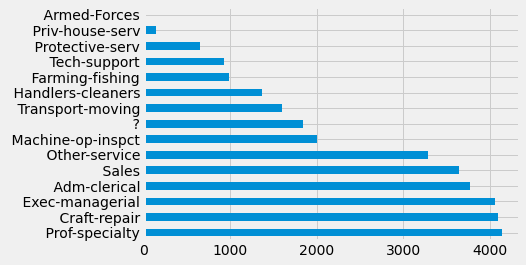

In [61]:
df['occupation'].value_counts().plot(kind='barh')

In [62]:
df['native-country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

# Replace special symbol with np.nan

In [63]:
df.replace(' ?', np.NAN, inplace=True)

In [64]:
df.isna().sum()

age                  0
workclass         1836
final_wt             0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [65]:
for col in ['workclass','occupation','native-country']:
    df[col].fillna(df[col].mode()[0],inplace=True)

<AxesSubplot:>

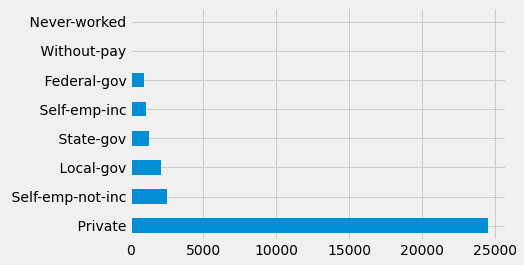

In [66]:
df['workclass'].value_counts().plot(kind='barh')

we can see from above, more people are working as employee

<AxesSubplot:>

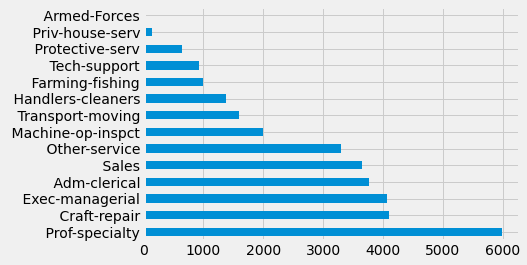

In [67]:
df['occupation'].value_counts().plot(kind='barh')

we can see that, more people are working as prof-speciality

<AxesSubplot:>

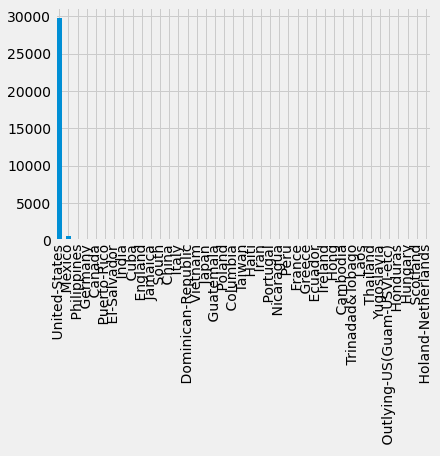

In [68]:
df['native-country'].value_counts().plot(kind='bar')

we can see that, more people are from united states

In [69]:
#correlation
df.corr()

,age,final_wt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
final_wt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
income,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


<AxesSubplot:>

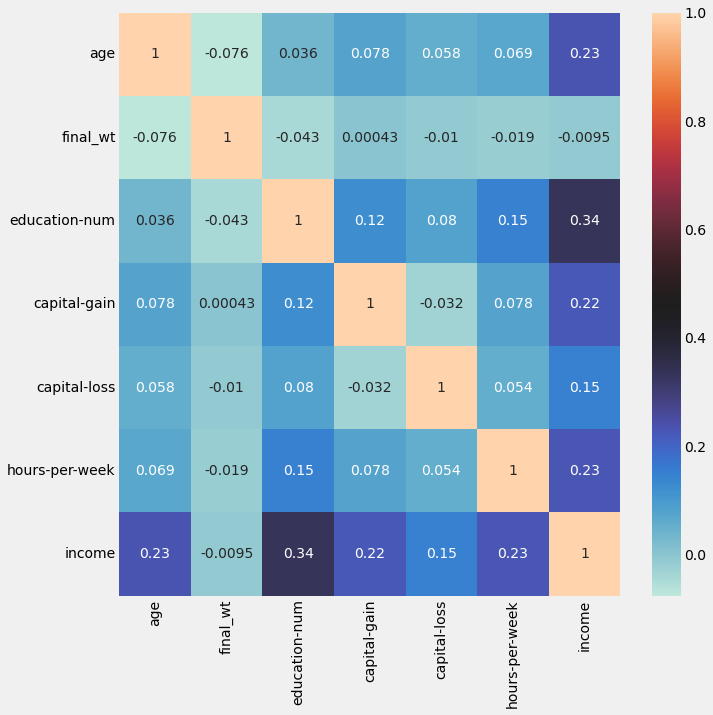

In [70]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(), annot=True, cmap='icefire')

THERE IS very less correlation betweemn featured , which shows the there is no to multicollinearity 2) final_wt has lowest correlation with rest of featurees 3) the highest correlation between eduaction and income

<AxesSubplot:xlabel='workclass', ylabel='count'>

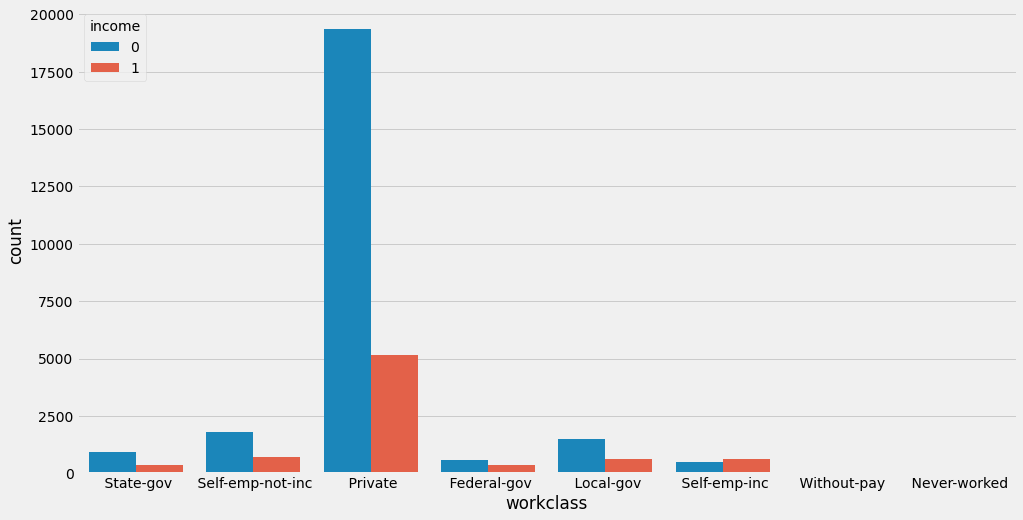

In [71]:
plt.figure(figsize=(15,8))
sn.countplot(x='workclass', hue='income', data=df)

observation more private employees getting more than 50k

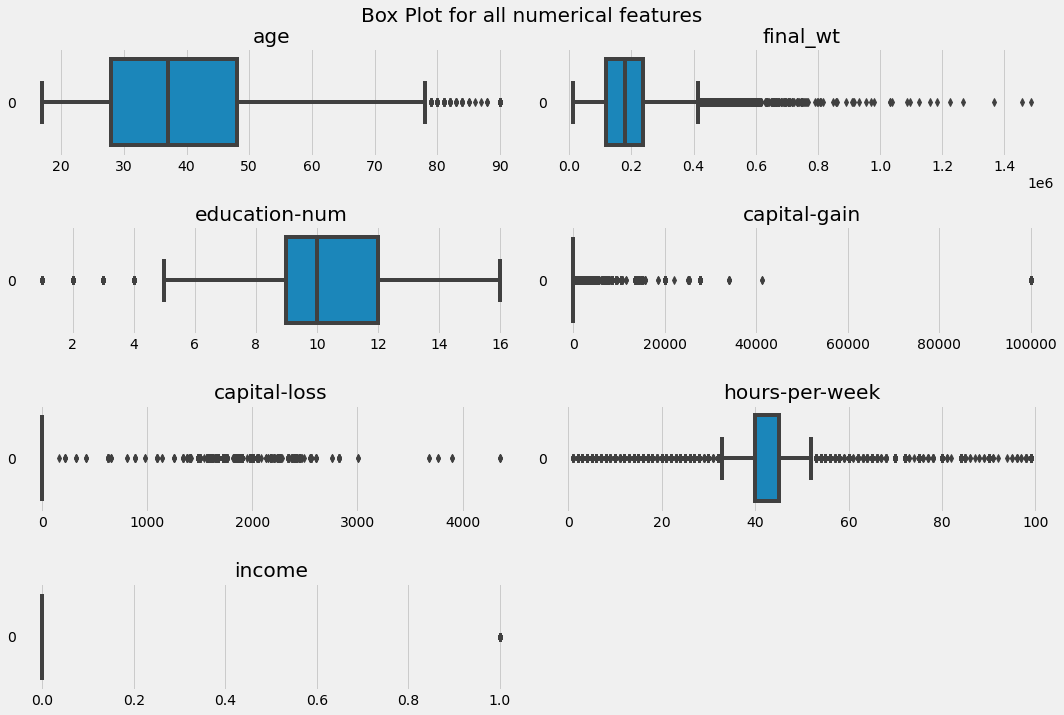

In [72]:
plt.figure(figsize=(15,20))
plt.suptitle('Box Plot for all numerical features', fontsize=20)
for i in range(0, len(num_fea)):
    plt.subplot(8, 2, i+1)
    sn.boxplot(data=df[num_fea[i]], orient='h')
    plt.title(label=num_fea[i])
    plt.tight_layout()

# Handling outlier of final_wt

In [73]:
IQR= df['final_wt'].quantile(0.75)-df['final_wt'].quantile(0.25)
Lower_limit=df['final_wt'].quantile(0.25)-1.5*IQR
Upper_limit=df['final_wt'].quantile(0.75)+1.5*IQR
print('Lower_limt:',Lower_limit)
print('Upper_limit:',Upper_limit)

Lower_limt: -60922.0
Upper_limit: 415742.0


# Removing outlier

In [74]:
df['final_wt']=np.where(df['final_wt']>Upper_limit,Upper_limit,np.where(df['final_wt']<Lower_limit,Lower_limit,df['final_wt']))

# Boxplot after handling outliers

<AxesSubplot:xlabel='final_wt'>

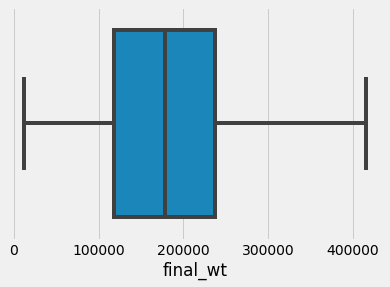

In [75]:
sn.boxplot(x='final_wt', data=df)

# Age

<AxesSubplot:xlabel='age'>

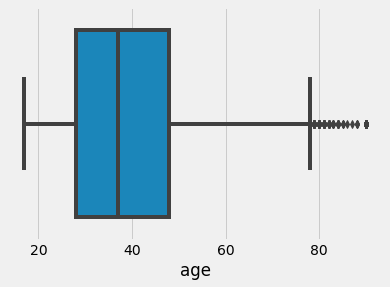

In [76]:
sn.boxplot(x='age', data=df)

# Handling outliers of Age

In [77]:
IQR= df['age'].quantile(0.75)-df['age'].quantile(0.25)
Lower_limit=df['age'].quantile(0.25)-1.5*IQR
Upper_limit=df['age'].quantile(0.75)+1.5*IQR
print('Lower_limt:',Lower_limit)
print('Upper_limit:',Upper_limit)

Lower_limt: -2.0
Upper_limit: 78.0


In [78]:
df['age']=np.where(df['age']>Upper_limit,Upper_limit,np.where(df['age']<Lower_limit,Lower_limit,df['age']))

<AxesSubplot:xlabel='age'>

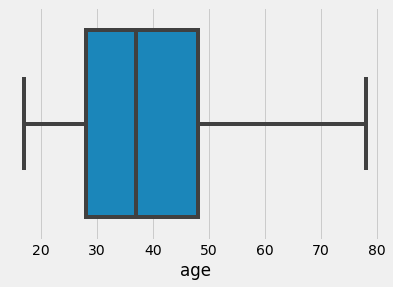

In [79]:
sn.boxplot(x='age', data=df)

# Hours per week 

In [80]:
IQR= df['hours-per-week'].quantile(0.75)-df['hours-per-week'].quantile(0.25)
Lower_limit=df['hours-per-week'].quantile(0.25)-1.5*IQR
Upper_limit=df['hours-per-week'].quantile(0.75)+1.5*IQR
print('Lower_limt:',Lower_limit)
print('Upper_limit:',Upper_limit)

Lower_limt: 32.5
Upper_limit: 52.5


In [81]:
df['hours-per-week']=np.where(df['hours-per-week']>Upper_limit,Upper_limit,np.where(df['hours-per-week']<Lower_limit,Lower_limit,df['hours-per-week']))

<AxesSubplot:xlabel='hours-per-week'>

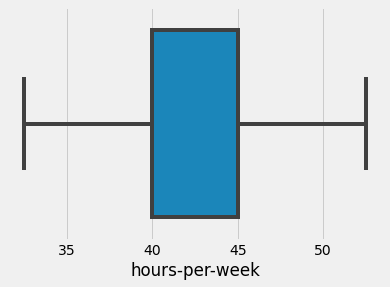

In [82]:
#After handling outliers
sn.boxplot(x='hours-per-week', data=df)

# Separating dependent and independent variables 

In [88]:
X=df.iloc[:,:-1]
y=df['income']

In [89]:
# We have Imbalanced Data and we have to do sampling to avoid this problem
# we have two method so for 1] Under Sampling, 2] Oversampling
# I will go for Oversampling.

ros =RandomOverSampler()
x_sample,y_sample= ros.fit_resample(x, y)

In [90]:
X.head()

,age,workclass,final_wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States
2,38.0,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States
3,53.0,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba


In [91]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

# Label encoding on the categorical features

In [92]:
labelEncoder=LabelEncoder()

In [93]:
x[cat_fea]=x[cat_fea].apply(LabelEncoder().fit_transform)

In [94]:
x.head()

,age,workclass,final_wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,6,77516.0,9,13,4,0,1,4,1,2174,0,40.0,38
1,50.0,5,83311.0,9,13,2,3,0,4,1,0,0,32.5,38
2,38.0,3,215646.0,11,9,0,5,1,4,1,0,0,40.0,38
3,53.0,3,234721.0,1,7,2,5,0,2,1,0,0,40.0,38
4,28.0,3,338409.0,9,13,2,9,5,2,0,0,0,40.0,4


In [95]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=10)   

In [97]:
x_train.shape

(21799, 14)

In [98]:
y_train.shape

(21799,)

In [99]:
x_test.shape

(10738, 14)

In [100]:
y_test.shape

(10738,)

In [101]:
report=[]

# Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [103]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [104]:
model.score(x_test,y_test)

0.8111380145278451

In [105]:
dt_pred=model.predict(x_test)

In [108]:
d_acc=accuracy_score(y_test,dt_pred)
report.append(['Decision Tree', d_acc])
d_acc

0.8111380145278451

# Hyperparameter Tuning

In [109]:
grid_param={
    'criterion':['gini', 'entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
    
    
}


In [110]:
dt_grid=GridSearchCV(estimator=model, param_grid=grid_param, cv=3, n_jobs=-1)

In [111]:
dt_grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [112]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'splitter': 'best'}

In [113]:
dt_best_para = DecisionTreeClassifier(criterion = "gini", max_depth= 8 , min_samples_leaf= 9, min_samples_split= 2 , splitter= "best")

In [114]:
dt_best_para.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=9)

In [115]:
dt_best_para_pred2 = dt_best_para.predict(x_test)

In [116]:
print("Accuracy Before Hyper-parameter tunning:",accuracy_score(y_test,dt_pred))
print("Accuracy after Hyper-parameter tunning:",accuracy_score(y_test,dt_best_para_pred2))

Accuracy Before Hyper-parameter tunning: 0.8111380145278451
Accuracy after Hyper-parameter tunning: 0.8573291115663997


In [129]:
import pickle
filename='income_pred_model'
pickle.dump(model, open(filename,'wb'))

In [130]:
loaded_model=pickle.load(open(filename,'rb'))

In [132]:
loaded_model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [134]:
df

,age,workclass,final_wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,0
2,38.0,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,0
3,53.0,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,0
32557,40.0,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,1
32558,58.0,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,0
32559,22.0,Private,201490.0,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,32.5,United-States,0


In [138]:
x

,age,workclass,final_wt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,6,77516.0,9,13,4,0,1,4,1,2174,0,40.0,38
1,50.0,5,83311.0,9,13,2,3,0,4,1,0,0,32.5,38
2,38.0,3,215646.0,11,9,0,5,1,4,1,0,0,40.0,38
3,53.0,3,234721.0,1,7,2,5,0,2,1,0,0,40.0,38
4,28.0,3,338409.0,9,13,2,9,5,2,0,0,0,40.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,3,257302.0,7,12,2,12,5,4,0,0,0,38.0,38
32557,40.0,3,154374.0,11,9,2,6,0,4,1,0,0,40.0,38
32558,58.0,3,151910.0,11,9,6,0,4,4,0,0,0,40.0,38
32559,22.0,3,201490.0,11,9,4,0,3,4,1,0,0,32.5,38
